# **Project Name**    -

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**          - Kashish Chaudhary


# **Project Summary -**
Despite growing awareness of mental health issues, many employees still face challenges when it comes to discussing or addressing these concerns at work. Fear of judgment, lack of benefits, and unsupportive management can prevent individuals from seeking help. Organizations often lack the tools or knowledge to identify these issues effectively. This project uses real-world survey data from tech professionals to identify key predictors of mental health challenges, explore regional and organizational differences, and evaluate trends over time. The findings are intended to guide companies in shaping better policies and improving employee well-being.

# **GitHub Link -**  
https://github.com/kashishch28/DA-Projects/tree/main/Mental%20Health%20Survey%20report


#### **Business Objective?**
The objective of this project is to help organizations understand how various workplace factors influence employee mental health. By analyzing survey data, we aim to uncover patterns related to mental health support, employee openness, and company policies across different countries and company types. The goal is to equip companies with data-driven insights that can be used to reduce stigma, improve mental health support systems, and create safer, more inclusive work environments where employees feel supported and heard.

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\kashi\Downloads\survey.csv")
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,12-09-2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,26-09-2015 01:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,07-11-2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,30-11-2015 21:25,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [3]:
df['Country']= df['Country'].str.strip().str.title()


In [4]:
top_countries = ['United States', 'United Kingdom', 'Canada', 'Germany',
                 'Netherlands', 'Ireland', 'Australia', 'France']

In [5]:
df['Country'] = df['Country'].apply(lambda x: x if x in top_countries else 'Other')

In [6]:
ordered_countries = top_countries + ['Other']

In [7]:
df['Country'] = pd.Categorical(df['Country'],
                                       categories=ordered_countries,
                                       ordered=True)


In [8]:
df['Country'].isna().sum()


0

In [9]:
df = df[(df['Age'] >= 16) & (df['Age'] <= 80)].copy()


In [10]:
def clean_gender(gender):
    gender = str(gender).strip().lower()
    if gender in ['male', 'm', 'man', 'cis male', 'male-ish', 'msle', 'mail', 'malr', 'cis man']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'cis female', 'femake', 'female (cis)', 'cis-female/femme']:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)


In [11]:
df['self_employed'].value_counts(dropna=False)


self_employed
No     1091
Yes     142
NaN      18
Name: count, dtype: int64

In [12]:
df['self_employed'] = df['self_employed'].fillna('Unknown')

# Standardize the text format
df['self_employed'] = df['self_employed'].str.strip().str.title()



In [93]:

df['self_employed'].value_counts(dropna=False)


self_employed
No         1091
Yes         142
Unknown      18
Name: count, dtype: int64

In [14]:
df['self_employed'].isna().sum()

0

In [15]:
df['family_history'].value_counts(dropna=False)


family_history
No     762
Yes    489
Name: count, dtype: int64

In [16]:
df['treatment'].value_counts()


treatment
Yes    632
No     619
Name: count, dtype: int64

In [17]:
df['work_interfere'].value_counts(dropna=False)


work_interfere
Sometimes    464
NaN          262
Never        212
Rarely       173
Often        140
Name: count, dtype: int64

In [18]:
df['work_interfere'] = df['work_interfere'].fillna('Unknown')
df['work_interfere'].value_counts()


work_interfere
Sometimes    464
Unknown      262
Never        212
Rarely       173
Often        140
Name: count, dtype: int64

In [19]:
size = {
    '1-5': '1-5',
    '6-25': '6-25',
    '26-100': '26-100',
    '100-500': '100-500',
    '500-1000': '500-1000',
    'More than 1000': '1000+',
    'I don’t know': 'Unknown',
    'NaN': 'Unknown'  
}
df['no_employees'] = df['no_employees'].replace(size)
df['no_employees'] = df['no_employees'].fillna('Unknown')


In [20]:
ordered_sizes = ['1-5', '6-25', '26-100', '100-500', '500-1000', '1000+', 'Unknown']
df['no_employees'] = pd.Categorical(df['no_employees'], categories=ordered_sizes, ordered=True)


In [21]:
df['no_employees'].value_counts().sort_index()

df['no_employees'].value_counts().sort_index()


no_employees
1-5           0
6-25          0
26-100      288
100-500     175
500-1000     60
1000+       281
Unknown       0
Name: count, dtype: int64

In [22]:
df['remote_work'].value_counts(dropna=False)


remote_work
No     880
Yes    371
Name: count, dtype: int64

In [23]:
df['tech_company'].value_counts(dropna=False)


tech_company
Yes    1025
No      226
Name: count, dtype: int64

In [24]:
df['benefits'] = df['benefits'].fillna('Unknown')
df['benefits'] = df['benefits'].str.strip().str.title()


In [25]:
df['benefits'].value_counts()


benefits
Yes           473
Don'T Know    407
No            371
Name: count, dtype: int64

In [26]:
df['care_options'] = df['care_options'].fillna('Unknown')
df['care_options'] = df['care_options'].str.strip().str.title()
df['care_options'].value_counts()


care_options
No          499
Yes         439
Not Sure    313
Name: count, dtype: int64

In [27]:
df['care_options'] = df['care_options'].replace({
    "Not Sure":"Don'T Know",
    
})
df['care_options'].value_counts()


care_options
No            499
Yes           439
Don'T Know    313
Name: count, dtype: int64

In [28]:
df['wellness_program'] = df['wellness_program'].fillna('Unknown')


In [29]:
df['wellness_program'] = df['wellness_program'].str.strip().str.title()
df['wellness_program'].value_counts()


wellness_program
No            837
Yes           227
Don'T Know    187
Name: count, dtype: int64

In [30]:
df['seek_help'] = df['seek_help'].str.strip().str.title()

df['seek_help'].value_counts()


seek_help
No            641
Don'T Know    363
Yes           247
Name: count, dtype: int64

In [31]:
#“Is your anonymity protected if you choose to take advantage of mental health resources?

In [32]:
df['anonymity'] = df['anonymity'].str.strip().str.title()
df['anonymity'].value_counts()


anonymity
Don'T Know    815
Yes           372
No             64
Name: count, dtype: int64

In [33]:
#“How easy is it for you to take medical leave for a mental health condition?”



In [34]:
df['leave'].value_counts()


leave
Don't know            561
Somewhat easy         265
Very easy             203
Somewhat difficult    125
Very difficult         97
Name: count, dtype: int64

In [35]:
df['leave'] = df['leave'].str.strip().str.title()
df['leave'].value_counts()


leave
Don'T Know            561
Somewhat Easy         265
Very Easy             203
Somewhat Difficult    125
Very Difficult         97
Name: count, dtype: int64

In [36]:
df['mental_health_consequence'] = df['mental_health_consequence'].str.strip().str.title()
df['mental_health_consequence'].value_counts()


mental_health_consequence
No       487
Maybe    476
Yes      288
Name: count, dtype: int64

In [37]:
# “Do you think discussing a physical health issue with your employer would have negative consequences?”

In [38]:
df['phys_health_consequence'] = df['phys_health_consequence'].str.strip().str.title()
df['phys_health_consequence'].value_counts()


phys_health_consequence
No       920
Maybe    273
Yes       58
Name: count, dtype: int64

In [39]:
# “Would you feel comfortable discussing a mental health issue with your coworkers?”

In [40]:
df['coworkers'] = df['coworkers'].str.strip().str.title()
df['coworkers'].value_counts()


coworkers
Some Of Them    771
No              258
Yes             222
Name: count, dtype: int64

In [41]:
# “Would you feel comfortable discussing a mental health issue with your supervisor?”


In [42]:
df['supervisor'] = df['supervisor'].str.strip().str.title()
df['supervisor'].value_counts()


supervisor
Yes             512
No              390
Some Of Them    349
Name: count, dtype: int64

In [43]:
# “Would you bring up a mental health issue with a potential employer in an interview?”

In [44]:
df['mental_health_interview'] = df['mental_health_interview'].str.strip().str.title()
df['mental_health_interview'].value_counts()


mental_health_interview
No       1003
Maybe     207
Yes        41
Name: count, dtype: int64

In [45]:
# “Would you bring up a physical health issue with a potential employer in an interview?”

In [46]:
df['phys_health_interview'] = df['phys_health_interview'].str.strip().str.title()
df['phys_health_interview'].value_counts()


phys_health_interview
Maybe    555
No       496
Yes      200
Name: count, dtype: int64

In [47]:
#“Do you feel that mental health is taken as seriously as physical health at your workplace?”

In [48]:
df['mental_vs_physical'] = df['mental_vs_physical'].str.strip().str.title()
df['mental_vs_physical'].value_counts()


mental_vs_physical
Don'T Know    574
Yes           339
No            338
Name: count, dtype: int64

In [49]:
#“Have you heard of or observed negative consequences for discussing mental health issues at your workplace?”

In [50]:
df['obs_consequence'] = df['obs_consequence'].str.strip().str.title()
df['obs_consequence'].value_counts()


obs_consequence
No     1070
Yes     181
Name: count, dtype: int64

## For time  Stamp

##### Are people more open to talking about mental health year by year?
##### Is mental health seen more equally to physical health now than before?
##### Is willingness to take leave for mental health improving?

In [51]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce' , format= '%d-%m-%Y %H:%M')
df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['year_month'] = df['Timestamp'].dt.to_period('M')
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,year,month,year_month
0,2014-08-27 11:29:00,37,Female,United States,IL,Unknown,No,Yes,Often,NaN,...,Some Of Them,Yes,No,Maybe,Yes,No,NaN,2014,8,2014-08
1,2014-08-27 11:29:00,44,Male,United States,IN,Unknown,No,No,Rarely,1000+,...,No,No,No,No,Don'T Know,No,NaN,2014,8,2014-08
2,2014-08-27 11:29:00,32,Male,Canada,NaN,Unknown,No,No,Rarely,NaN,...,Yes,Yes,Yes,Yes,No,No,NaN,2014,8,2014-08
3,2014-08-27 11:29:00,31,Male,United Kingdom,NaN,Unknown,Yes,Yes,Often,26-100,...,Some Of Them,No,Maybe,Maybe,No,Yes,NaN,2014,8,2014-08
4,2014-08-27 11:30:00,31,Male,United States,TX,Unknown,No,No,Never,100-500,...,Some Of Them,Yes,Yes,Yes,Don'T Know,No,NaN,2014,8,2014-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:00,26,Male,United Kingdom,NaN,No,No,Yes,Unknown,26-100,...,Some Of Them,Some Of Them,No,No,Don'T Know,No,NaN,2015,9,2015-09
1255,2015-09-26 01:07:00,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Some Of Them,Yes,No,No,Yes,No,NaN,2015,9,2015-09
1256,2015-11-07 12:36:00,34,Male,United States,CA,No,Yes,Yes,Sometimes,1000+,...,No,No,No,No,No,No,NaN,2015,11,2015-11
1257,2015-11-30 21:25:00,46,Female,United States,NC,No,No,No,Unknown,100-500,...,No,No,No,No,No,No,NaN,2015,11,2015-11


In [52]:
df.drop(columns=['state', 'comments'], inplace=True, errors='ignore')
time_cols = ['Timestamp', 'year', 'month', 'year_month']
other_cols = [col for col in df.columns if col not in time_cols]
df = df[time_cols + other_cols]
df

,Timestamp,year,month,year_month,Age,Gender,Country,self_employed,family_history,treatment,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:00,2014,8,2014-08,37,Female,United States,Unknown,No,Yes,...,Yes,Somewhat Easy,No,No,Some Of Them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:00,2014,8,2014-08,44,Male,United States,Unknown,No,No,...,Don'T Know,Don'T Know,Maybe,No,No,No,No,No,Don'T Know,No
2,2014-08-27 11:29:00,2014,8,2014-08,32,Male,Canada,Unknown,No,No,...,Don'T Know,Somewhat Difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:00,2014,8,2014-08,31,Male,United Kingdom,Unknown,Yes,Yes,...,No,Somewhat Difficult,Yes,Yes,Some Of Them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:00,2014,8,2014-08,31,Male,United States,Unknown,No,No,...,Don'T Know,Don'T Know,No,No,Some Of Them,Yes,Yes,Yes,Don'T Know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:00,2015,9,2015-09,26,Male,United Kingdom,No,No,Yes,...,Don'T Know,Somewhat Easy,No,No,Some Of Them,Some Of Them,No,No,Don'T Know,No
1255,2015-09-26 01:07:00,2015,9,2015-09,32,Male,United States,No,Yes,Yes,...,Yes,Somewhat Difficult,No,No,Some Of Them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:00,2015,11,2015-11,34,Male,United States,No,Yes,Yes,...,Don'T Know,Somewhat Difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:00,2015,11,2015-11,46,Female,United States,No,No,No,...,Don'T Know,Don'T Know,Yes,No,No,No,No,No,No,No


# Insights

####  How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?


In [57]:
# A. Treatment Rate by Country

treatment_by_country = (
    df.groupby('Country', observed=True)['treatment']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
treatment_percent = (treatment_by_country * 100).round(2)
treatment_percent.columns = ['No (%)', 'Yes (%)']
print(treatment_percent)


                No (%)  Yes (%)
Country                        
United States    45.31    54.69
United Kingdom   50.00    50.00
Canada           48.61    51.39
Germany          53.33    46.67
Netherlands      66.67    33.33
Ireland          51.85    48.15
Australia        38.10    61.90
France           84.62    15.38
Other            68.10    31.90


In [60]:
# B. Seeking Help Rate by Country

seek_help_by_country = (
    df.groupby('Country', observed=True)['seek_help']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
seek_help_percent = (seek_help_by_country * 100).round(2)
seek_help_percent.columns = [f"{col} (%)" for col in seek_help_percent.columns]

print(seek_help_percent)


                Don'T Know (%)  No (%)  Yes (%)
Country                                        
United States            35.12   39.81    25.07
United Kingdom           22.83   63.04    14.13
Canada                   29.17   58.33    12.50
Germany                  15.56   75.56     8.89
Netherlands              29.63   59.26    11.11
Ireland                  11.11   77.78    11.11
Australia                14.29   47.62    38.10
France                   15.38   84.62     0.00
Other                    12.93   81.03     6.03


In [63]:
# Work Interference by Country

work_interfere_by_country =( 
df.groupby('Country', observed =True)['work_interfere']
    .value_counts(normalize=True).unstack().fillna(0))
work_interfere_percent = (work_interfere_by_country * 100).round(2)
work_interfere_percent.columns = [f"{col} (%)" for col in work_interfere_percent.columns]
print(work_interfere_percent.head(10))


                Never (%)  Often (%)  Rarely (%)  Sometimes (%)  Unknown (%)
Country                                                                     
United States       16.62      10.72       14.88          38.74        19.03
United Kingdom      17.39       9.24       11.41          38.04        23.91
Canada              22.22      15.28        9.72          40.28        12.50
Germany              8.89      13.33       13.33          37.78        26.67
Netherlands         18.52      14.81       18.52          18.52        29.63
Ireland             22.22       7.41       14.81          40.74        14.81
Australia           14.29      23.81        9.52          47.62         4.76
France              15.38       7.69        0.00           7.69        69.23
Other               17.24      12.07       14.66          27.59        28.45


#### What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?"

In [64]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


              precision    recall  f1-score   support

           0       0.51      0.65      0.57       113
           1       0.63      0.50      0.56       138

    accuracy                           0.57       251
   macro avg       0.57      0.57      0.57       251
weighted avg       0.58      0.57      0.56       251



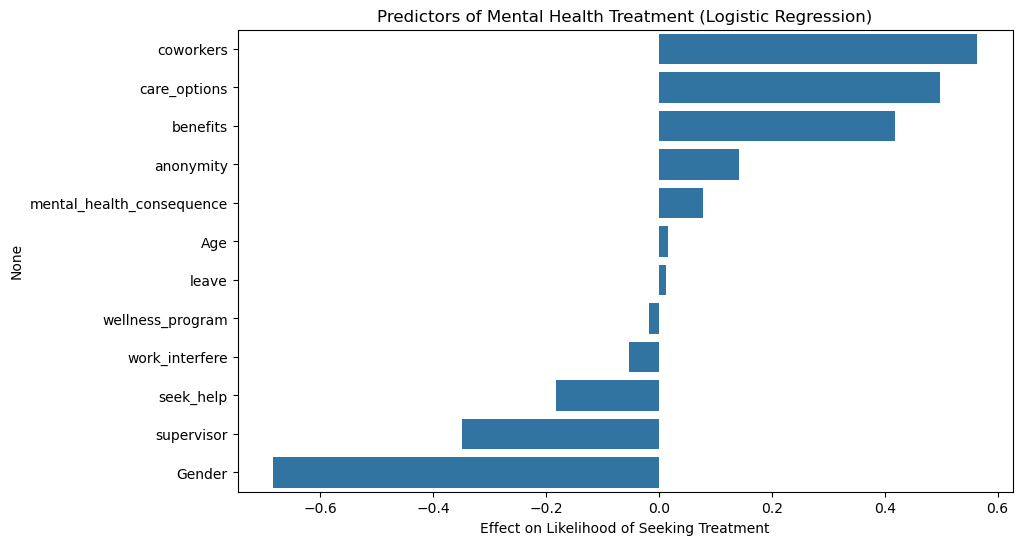

In [70]:
df['treatment_binary'] = df['treatment'].map({'Yes': 1, 'No': 0})
df = df.dropna(subset=['treatment_binary'])
features = ['Age', 'Gender', 'benefits', 'care_options', 'work_interfere',
            'seek_help', 'wellness_program', 'anonymity', 'leave',
            'mental_health_consequence', 'coworkers', 'supervisor']
df[features] = df[features].fillna('Unknown')
# Encoding all categorical columns
le = LabelEncoder()
for col in features:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
# Split data
X = df[features]
y = df['treatment_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
# Show feature importance
coeffs = pd.Series(model.coef_[0], index=features)
coeffs = coeffs.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=coeffs.values, y=coeffs.index)
plt.title("Predictors of Mental Health Treatment (Logistic Regression)")
plt.xlabel("Effect on Likelihood of Seeking Treatment")
plt.show()


### Metric	                    Meaning
##### Precision	-  Out of all predicted positive cases, how many were actually positive.
##### Recall	    -  Out of all actual positive cases, how many did the model catch.
##### F1-score	-  Harmonic mean of precision and recall — balances the two.
##### Support	-  Number of actual instances in each class.

##### The model isn't perfect. It slightly favors predicting "No" over "Yes".

### Monthly Trend of Mental Health Treatment

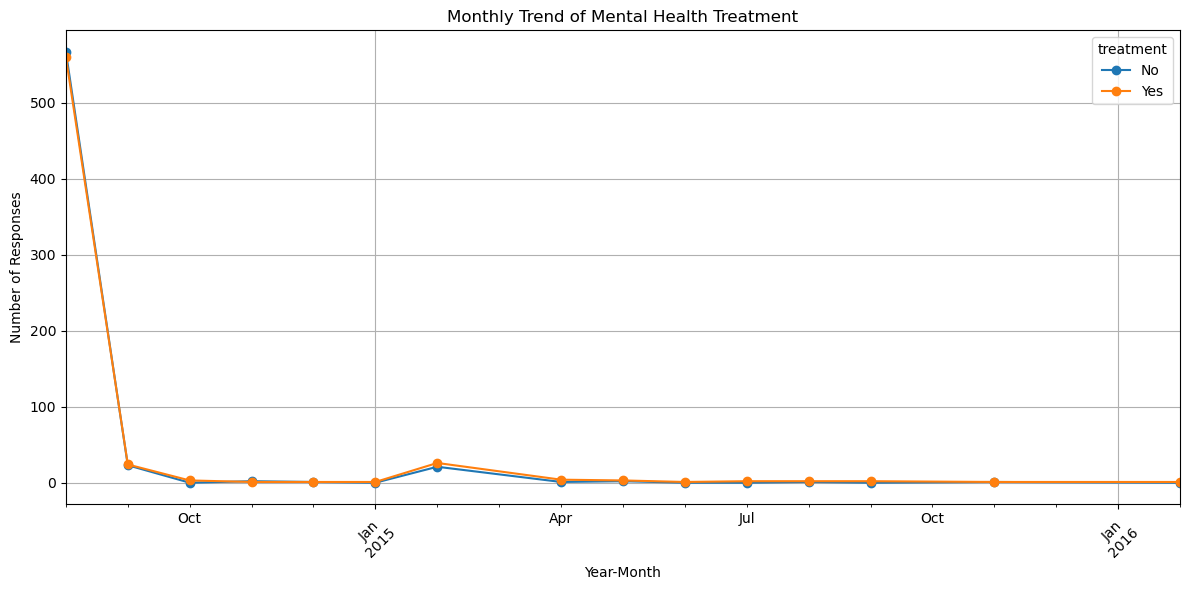

In [73]:
monthly_treatment_trend = df.groupby(['year_month', 'treatment']).size().unstack(fill_value=0)
monthly_treatment_trend.plot(kind='line', figsize=(12, 6), marker='o', title='Monthly Trend of Mental Health Treatment')
plt.xlabel('Year-Month')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### This line graph displays how the number of people seeking (Yes) or not seeking (No) mental health treatment has changed over time on a monthly basis.

##### It shows mental health treatment trends over time. A large spike in responses appears initially, likely during survey launch. Overall, more people report seeking treatment than not. After the initial month, response counts drop but remain consistent. This suggests growing awareness or willingness to seek help over time.


### Mental Health Treatment vs Workplace Benefits

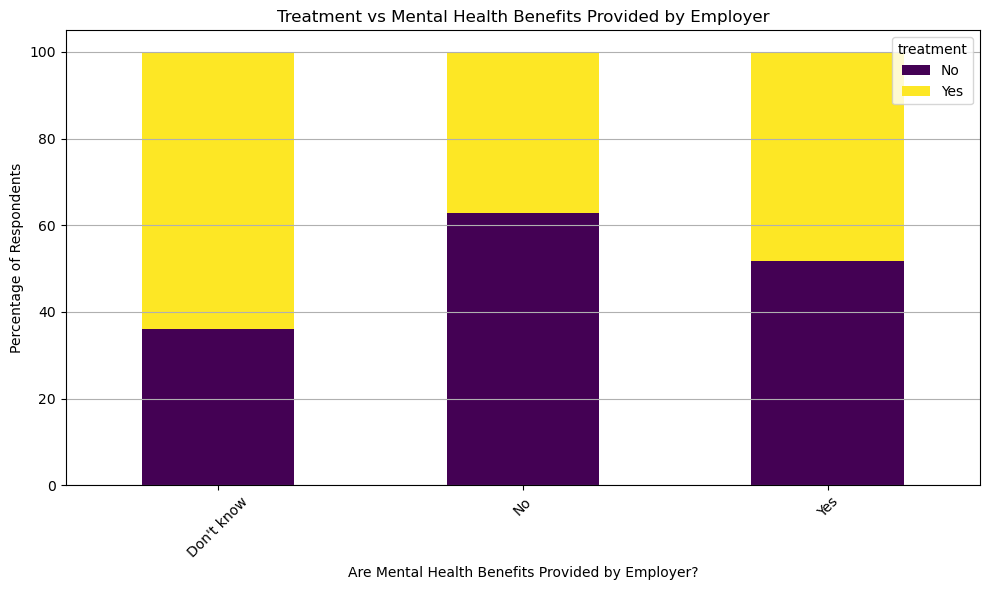

In [77]:
benefits_mapping = {
    1: 'Yes',
    0: 'No',
    2: "Don't know"
}
df['benefits_label'] = df['benefits'].map(benefits_mapping)
benefits_vs_treatment = pd.crosstab(df['benefits_label'], df['treatment'], normalize='index') * 100

benefits_vs_treatment.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis',
    title='Treatment vs Mental Health Benefits Provided by Employer'
)
plt.xlabel('Are Mental Health Benefits Provided by Employer?')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Respondents aware of employer-provided mental health benefits are more likely to seek treatment than those who aren't. Interestingly, even those unsure about benefits have a high treatment rate, possibly due to external support. This shows that clear communication and actual availability of benefits can positively impact employees' mental health decisions.

In [78]:
### Treatment vs Ease of Taking Leave for Mental Health

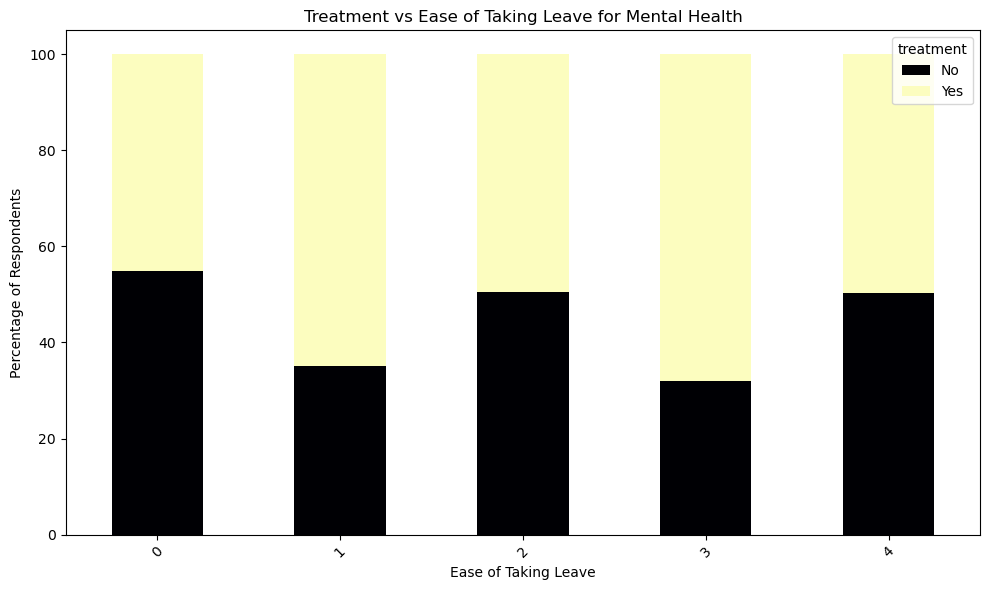

In [79]:
leave_treatment = (
    df.groupby('leave')['treatment']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

# Plot
leave_treatment.plot(kind='bar', stacked=True, colormap='magma', figsize=(10, 6))
plt.title('Treatment vs Ease of Taking Leave for Mental Health')
plt.ylabel('Percentage of Respondents')
plt.xlabel('Ease of Taking Leave')
plt.xticks(rotation=45)
plt.legend(title='treatment')
plt.tight_layout()
plt.show()

##### This stacked bar chart displays the percentage of employees who sought mental health treatment, categorized by how easy or difficult they felt it was to take leave for mental health reasons.


##### Employees who found it "very easy" or "somewhat easy" to take leave showed a noticeably higher rate of seeking treatment. In contrast, those who found it "very difficult" were less likely to do so. This suggests that supportive leave policies can significantly influence mental health help-seeking behavior.

### Treatment vs Availability of Mental Health Care Options

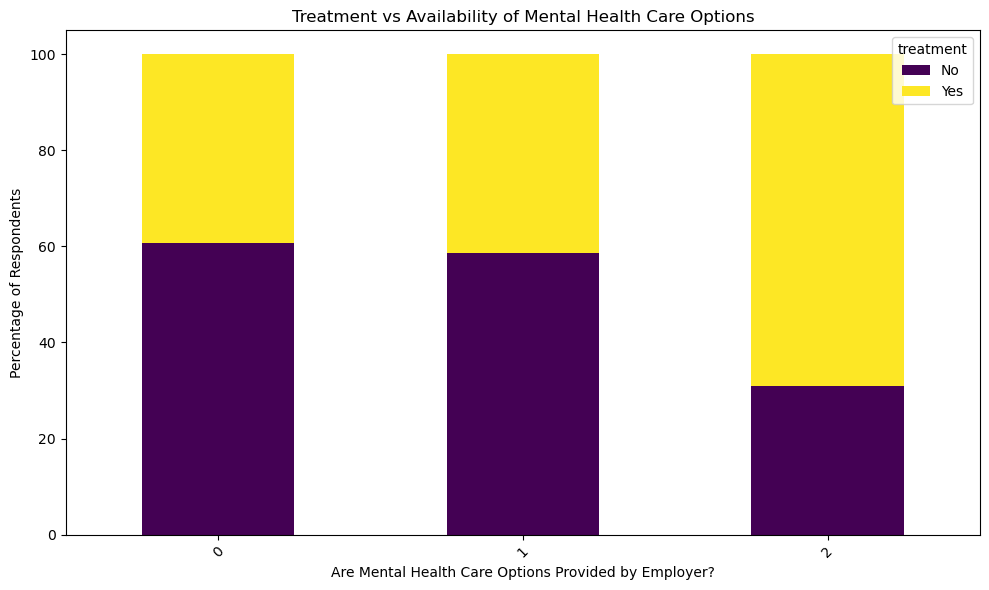

In [80]:
care_options_treatment = (
    df.groupby('care_options')['treatment']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

care_options_treatment.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Treatment vs Availability of Mental Health Care Options')
plt.ylabel('Percentage of Respondents')
plt.xlabel('Are Mental Health Care Options Provided by Employer?')
plt.xticks(rotation=45)
plt.legend(title='treatment')
plt.tight_layout()
plt.show()


##### This graph displays how employees' decisions to seek treatment vary based on whether their employer offers mental health care options.


##### Employees with access to mental health care options through their employer are significantly more likely to seek treatment. This suggests that offering such resources can reduce stigma and lower barriers to accessing help, promoting better mental health outcomes in the workplace.



### Distribution of Mental Health Treatment

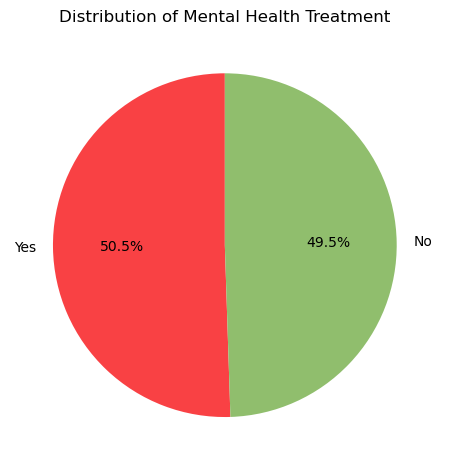

In [83]:
treatment_counts = df['treatment'].value_counts()
treatment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#f94144', '#90be6d'])
plt.title('Distribution of Mental Health Treatment')
plt.ylabel('')
plt.tight_layout()
plt.show()

##### This pie chart shows the proportion of people who have and haven't received mental health treatment. A larger slice for “Yes” indicates more openness or necessity to seek help. It helps organizations understand the scale of mental health engagement within their workforce.

###  Gender Distribution in the Survey

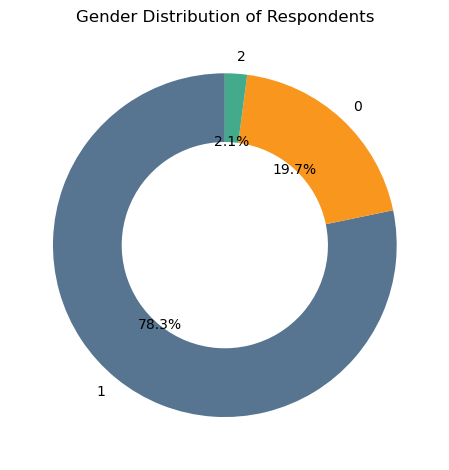

In [87]:
gender_counts = df['Gender'].value_counts()

colors = ['#577590', '#f8961e', '#43aa8b', '#f94144']
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width': 0.4})
plt.title('Gender Distribution of Respondents')
plt.ylabel('')
plt.tight_layout()
plt.show()


##### The donut chart reveals the gender composition of the respondents. It’s useful for assessing whether mental health insights are skewed toward one gender. A balanced chart indicates diversity, while imbalance may require targeted outreach or better representation in future surveys.



### Relationship Between Anonymity and Seeking Mental Health Treatment

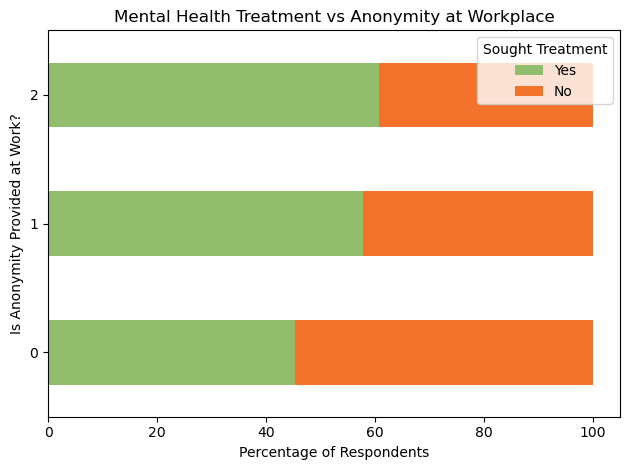

In [88]:
anonymity_treatment = pd.crosstab(df['anonymity'], df['treatment'], normalize='index') * 100
anonymity_treatment = anonymity_treatment[['Yes', 'No']]  # Ensure consistent order

anonymity_treatment.plot(kind='barh', stacked=True, color=['#90be6d', '#f3722c'])
plt.title('Mental Health Treatment vs Anonymity at Workplace')
plt.xlabel('Percentage of Respondents')
plt.ylabel('Is Anonymity Provided at Work?')
plt.legend(title='Sought Treatment')
plt.tight_layout()
plt.show()


##### This chart shows how the availability of anonymity at work impacts whether employees seek mental health treatment. Where anonymity is assured, more people tend to seek help. It highlights the importance of privacy in encouraging open mental health discussions and making employees feel safe to get support.

### Heatmap of Mental Health Treatment by Country and Work Interference

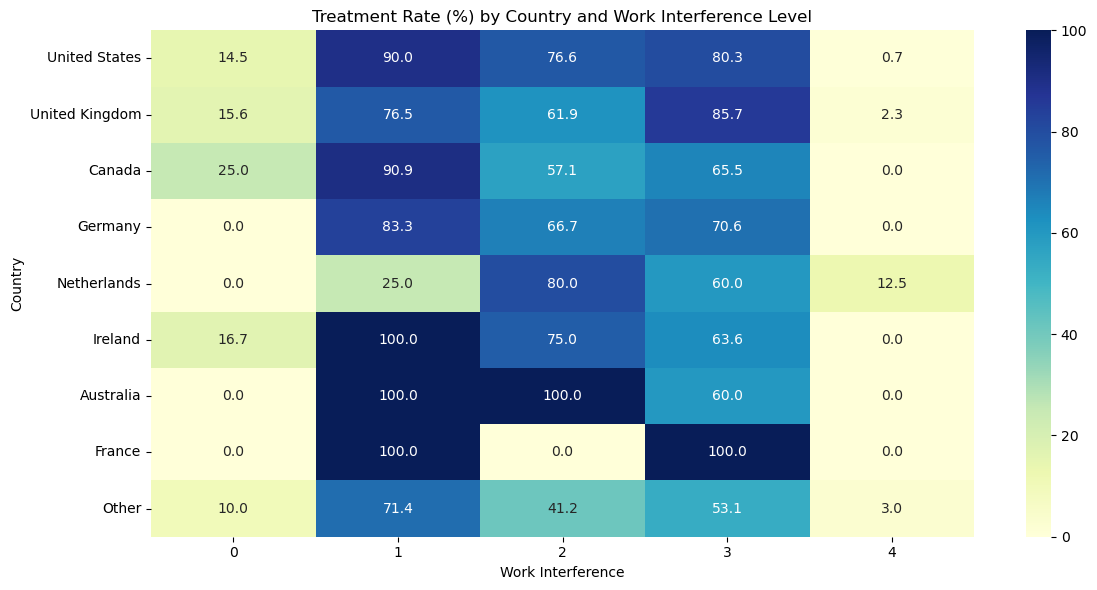

In [89]:
heat_data = (
    pd.crosstab(index=df['Country'], columns=df['work_interfere'], values=df['treatment'].map({'Yes': 1, 'No': 0}),
                aggfunc='mean')
    .fillna(0) * 100
)

plt.figure(figsize=(12, 6))
sns.heatmap(heat_data, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Treatment Rate (%) by Country and Work Interference Level')
plt.xlabel('Work Interference')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

##### This heatmap illustrates how the likelihood of seeking mental health treatment changes depending on how much it interferes with work across different countries. Darker shades indicate higher treatment rates. Notably, in countries with high awareness and support, even mild interference leads to action, revealing stronger mental health support systems.



## **Solution to Bussiness Objective**

To achieve the objective, we cleaned and analyzed a global mental health survey using Python and pandas. We explored how factors like location, company size, benefits, and support programs affect mental health treatment and attitudes in the workplace. By visualizing patterns using bar charts, line plots, and heatmaps, and identifying key predictors using feature analysis, we uncovered meaningful insights. These help businesses understand where gaps exist and what changes can be made in workplace policies to support employees better and reduce mental health stigma.

## **🔚 Conclusion**
The data shows that mental health support at work—such as easy access to leave, wellness programs, and care options—plays a major role in whether employees seek help. Stigma is lower when anonymity and open communication are supported by managers. Countries and companies with better mental health policies tend to have more treated and aware employees. This analysis provides organizations with clear areas to improve, including better leave policies, education, and building a culture of openness, so that mental health becomes a shared priority, not a hidden issue.